last value: 5.987733500509287


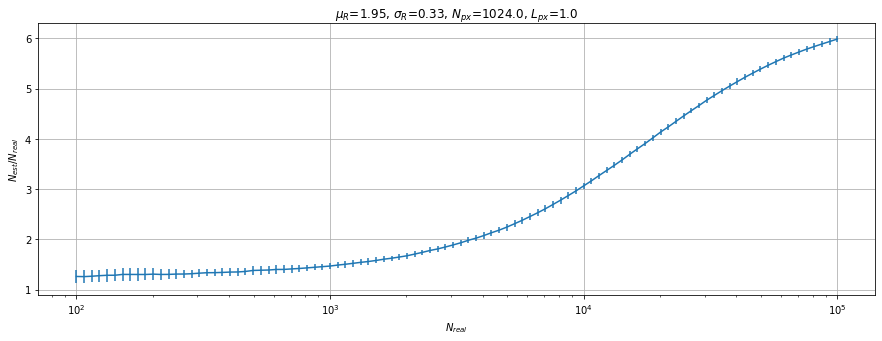

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def plotpar_fromfile(filename, xlab, ylab, xscale='linear', yscale='linear', a=0, b=0, xfile=''):
    est, Ntrue, err= np.loadtxt(filename)
    if xfile!='': Ntrue,N,newx_err=np.loadtxt(xfile) #metto il parametro in Ntrue
    
    out=open(filename)
    line1=out.readline()
    line2=out.readline()
    param=np.fromstring(line1[2:], sep=' ')
    name=line2[2:].split()
    out.close()
    
    print('last value:', est[-1])
    plt.figure(figsize=(15,5))
    plt.errorbar(Ntrue, est, yerr=err)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid()
    plt.title(name[0]+'='+str(round(param[0], 2))+', '+name[1]+'='+str(round(param[1], 2))+', '+
              name[2]+'='+str(param[2])+', '+name[3]+'='+str(param[3]))
    if a<b:
        passedA=False
        for i in range(len(Ntrue)):
            if Ntrue[i]>a and not(passedA):
                a=i
                passedA=True
                
            if Ntrue[i]>b: break
            else: b_ind=i
        
        x=Ntrue[a:b_ind].reshape(-1,1)
        y=  est[a:b_ind].reshape(-1,1)
        if xscale=='log': x_reg=np.log10(x)
        else: x_reg=x
        
        if yscale=='log': y_reg=np.log10(y)
        else: y_reg=y
            
        model  = LinearRegression().fit(x_reg,y_reg)
        
        if yscale=='log': plt.plot(x,10 ** model.predict(x_reg), color='red')
        else: plt.plot(x,model.predict(x_reg), color='red')
        print('coefficient:',model.coef_[0][0])
        print('mean squared error:', mean_squared_error(y_reg, model.predict(x_reg)) )
    plt.show()

plotpar_fromfile('scaling_mpi/N_relvsN.dat', r'$N_{real}$', r'$N_{est} / N_{real}$', xscale='log', yscale='linear')#, a=80,b=5000)
#plotpar_fromfile('scaling_mpi/V_relvsN.dat', r'$N_{real}$', r'$V_{est} / V_{real}$', xscale='log', yscale='linear')#, a=80,b=5000)
#plt.figure(figsize=(15,5))
#plt.plot(h[],)

last value: 1339.2797108560692


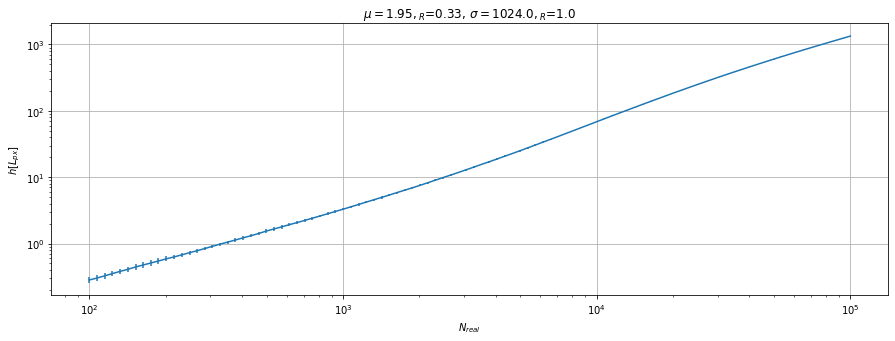

last value: 1674.453671255784


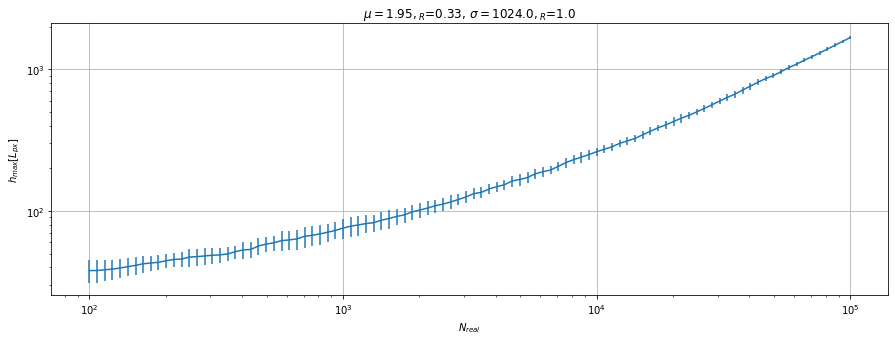

In [3]:
plotpar_fromfile('scaling_mpi/hvsN.dat', r'$N_{real}$', r'$h [L_{px}]$', xscale='log', yscale='log')#, a=100, b=10000)
plotpar_fromfile('scaling_mpi/maxhvsN.dat', r'$N_{real}$', r'$h_{max} [L_{px}]$', xscale='log', yscale='log')#, a=10,b=1000)

last value: 124.35106573631195
coefficient: 0.7229369247857734
mean squared error: 0.0006872761383377694


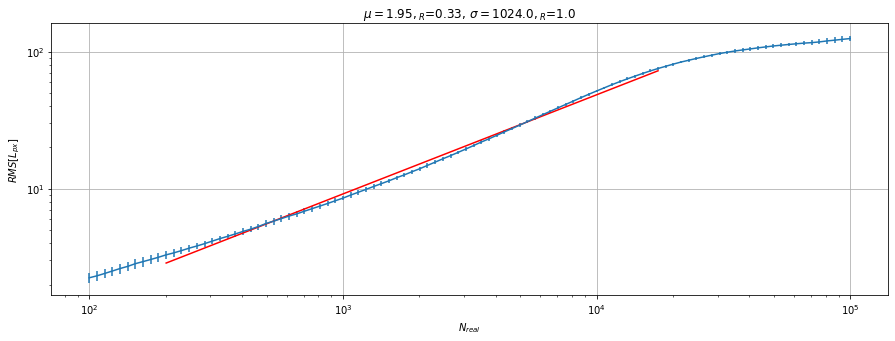

In [5]:
plotpar_fromfile('scaling_mpi/rmsvsN.dat', r'$N_{real}$', r'$RMS [L_{px}]$', xscale='log', yscale='log', a=200,b=20000)
#rms,n,rms_err=np.loadtxt('scaling_mpi/rmsvsN.dat')
#h,n,h_err=np.loadtxt('scaling_mpi/hvsN.dat')
#plt.figure(figsize=(15,5))
#plt.errorbar(h,rms, xerr=h_err, yerr=rms_err)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylabel(r'$RMS [L_{px}]$')
#plt.xlabel(r'$h [L_{px}]$')
#plt.grid()
#plt.show()

coefficient: -0.052671409416098096
mean squared error: 0.0018849717518798562


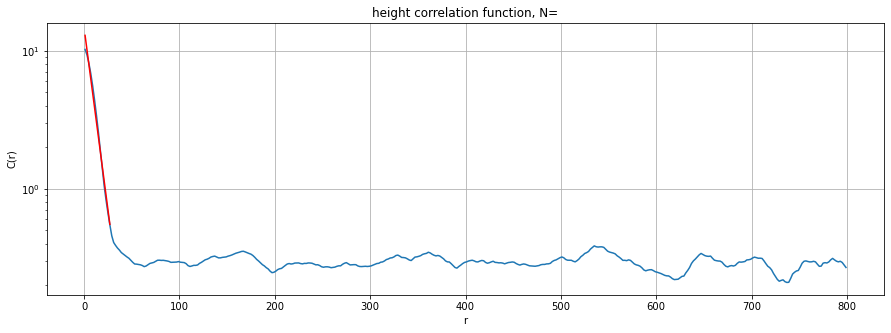

coefficient: -0.03581821264887393
mean squared error: 0.0005577565095230471


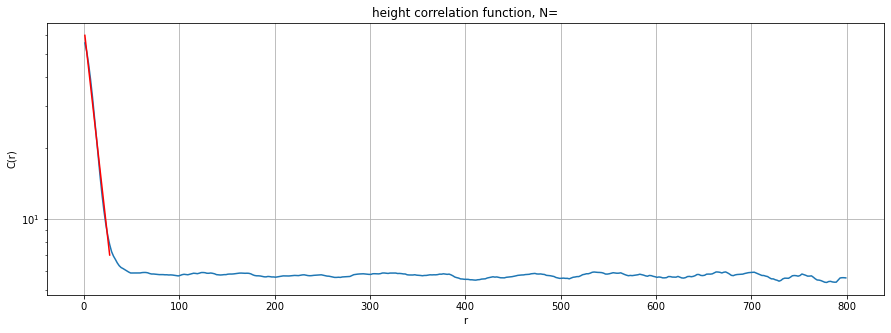

coefficient: -0.01820120312554133
mean squared error: 0.0003366227526662051


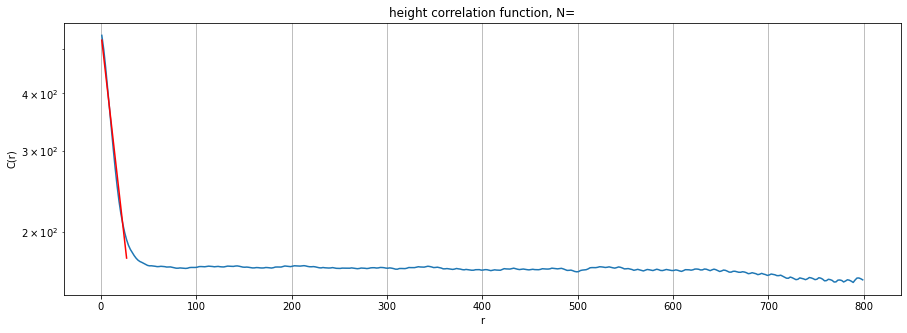

coefficient: -0.004623106435499515
mean squared error: 7.196845357196877e-05


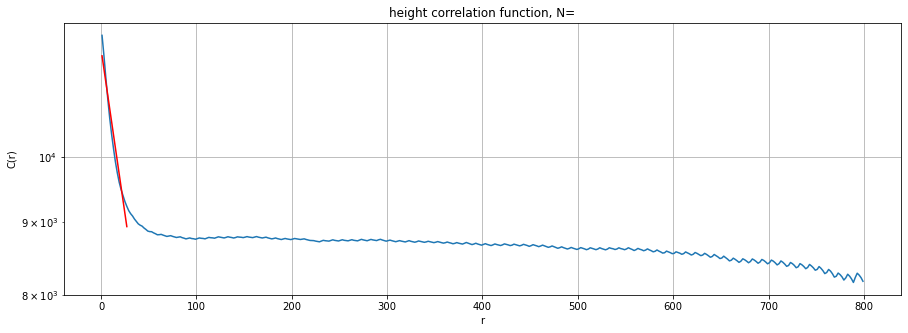

coefficient: -0.0002923152394391347
mean squared error: 7.869423856337824e-07


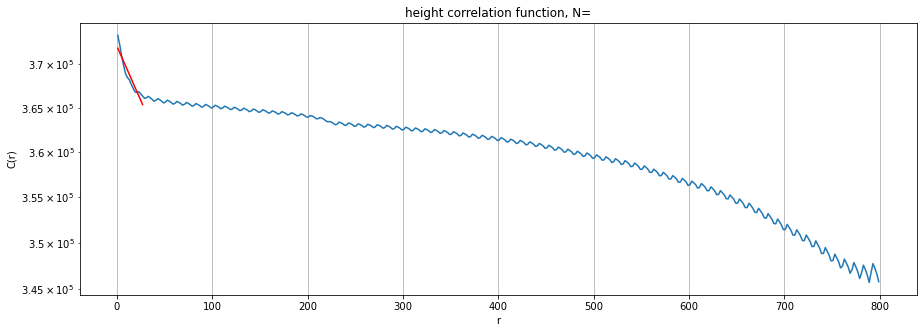

In [47]:
from scipy.optimize import curve_fit

def G_gauss_prof(lLw, alfa):
    l_xy,L,w=lLw
    return 2*w**2 *( 1-np.exp(- (l_xy/L)**(2*alfa)) )

def plotcorr_fromfile(filename, Nline, xscale='linear', yscale='linear', a=0, b=0, L=-1):
    ind=filename.find('/')
    x=np.loadtxt(filename[:ind+1]+'x.dat')
    
    out=open(filename)
    for i in range(Nline-1): out.readline()
    line=out.readline()
    y=np.fromstring(line, sep=' ')
    out.close()
    
    out=open(filename[:ind+2]+'2.dat')
    for i in range(Nline-1): out.readline()
    line=out.readline()
    err=np.sqrt(abs(np.fromstring(line, sep=' ')))
    out.close()
    
    plt.figure(figsize=(15,5))
    #plt.errorbar(x, y, yerr=err)
    plt.plot(x,y)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlabel('r')
    plt.ylabel(filename[ind+1]+'(r)')
    plt.grid()
    if filename[ind+1]=='C': plt.title('height correlation function, N=')
    if filename[ind+1]=='G': plt.title('height-height correlation function, N=')
    
    if L>0 and filename[ind+1]=='G':
        rms= np.loadtxt(filename[:ind+1]+'rmsvsN.dat', max_rows=1)
        opt,cov= curve_fit(G_gauss_prof, (x, np.ones(len(x))*L, np.ones(len(x))*rms[Nline-1]), y)
        alfa_est= opt
        alfa_err= cov[0]
        print(alfa_est, alfa_err)

    if a<b:
        passedA=False
        for i in range(len(x)):
            if x[i]>a and not(passedA):
                a=i
                passedA=True
                
            if x[i]>b: break
            else: b_ind=i
        
        x=x[a:b_ind].reshape(-1,1)
        y=  y[a:b_ind].reshape(-1,1)
        if xscale=='log': x_reg=np.log10(x)
        else: x_reg=x
        
        if yscale=='log': y_reg=np.log10(y)
        else: y_reg=y
            
        model  = LinearRegression().fit(x_reg,y_reg)
        
        if yscale=='log': plt.plot(x,10 ** model.predict(x_reg), color='red')
        else: plt.plot(x,model.predict(x_reg), color='red')
        print('coefficient:',model.coef_[0][0])
        print('mean squared error:', mean_squared_error(y_reg, model.predict(x_reg)) )
    plt.show()

for i in range(10,91,20):
    plotcorr_fromfile('scaling_mpi/C.dat', i, xscale='linear', yscale='log', a=0,b=30)
#plotcorr_fromfile('scaling_mpi/G.dat', 50, xscale='log', yscale='log',L=54.94,)